In [114]:
    %matplotlib inline

import matplotlib.pyplot as plt
import collections
import numpy as np

## Task 3d

In [60]:
for lp in (-3, -2, -1, 0, 1, 2, 3):
    l = 10**lp

    !python fileprob.py TRAIN add"$l" data/lexicons/words-10.txt data/english_spanish/train/en.1K 2>/dev/null
    !python fileprob.py TRAIN add"$l" data/lexicons/words-10.txt data/english_spanish/train/sp.1K 2>/dev/null

    ce1 = !python fileprob.py TEST add"$l" data/lexicons/words-10.txt data/english_spanish/train/en.1K data/english_spanish/dev/english/*/* 2>/dev/null
    ce2 = !python fileprob.py TEST add"$l" data/lexicons/words-10.txt data/english_spanish/train/sp.1K data/english_spanish/dev/spanish/*/* 2>/dev/null
    print(f"{l}:", float(ce1[0]) + float(ce2[0]))

0.001: 195954.7156971
0.01: 158465.0791245
0.1: 133896.722373
1: 140360.52729569998
10: 157568.7587143
100: 163122.3797786
1000: 163877.65672919998


In [53]:
132388.8557662 / (17069+16820)

3.9065435913187168

## Task 3e

In [61]:
l = 0.2

!python textcat.py TRAIN add"$l" data/lexicons/words-10.txt data/english_spanish/train/en.1K data/english_spanish/train/sp.1K 2>/dev/null

out = !python textcat.py TEST  add"$l" data/lexicons/words-10.txt data/english_spanish/train/en.1K data/english_spanish/train/sp.1K 0.7 data/english_spanish/dev/*/*/*

In [88]:
xs = []
ys = []

for line in out[5:]:
    if '\t' in line:
        label, filename = line.split()
        f1 = (label[:2] == filename[:2])
        f2 = int(filename.split('.')[1])
        xs.append(f1)
        ys.append(f2)

xs = np.array(xs)
ys = np.array(ys)

In [128]:
xxs = []
yys = []

for t in sorted(set(ys)):
    x = collections.Counter(ys[xs == True])[t]
    y = collections.Counter(ys)[t]
    acc = x / y
    xxs.append(t)
    yys.append(acc)

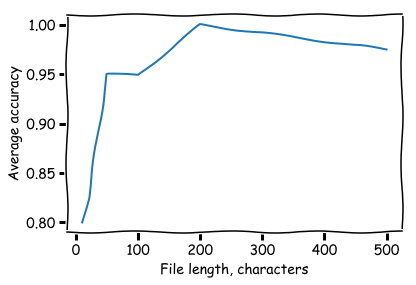

In [146]:
plt.xkcd(scale=1)
plt.plot(xxs, yys)
plt.xlabel('File length, characters')
plt.ylabel('Average accuracy')
plt.savefig('filesize.pdf', bbox_inches='tight')

## Task 3f

In [167]:
l = 0.2
d = "50K"

!python textcat.py TRAIN add"$l" data/lexicons/words-10.txt data/english_spanish/train/en."$d" data/english_spanish/train/sp."$d" 2>/dev/null

out = !python textcat.py TEST  add"$l" data/lexicons/words-10.txt data/english_spanish/train/en."$d" data/english_spanish/train/sp."$d" 0.7 data/english_spanish/dev/*/*/*

In [168]:
np.mean([s.split()[0][:2] == s.split()[1][:2] for s in out[5:]])

0.983402489626556

1K - 0.909

2K - 0.871

5K - 0.942

10K - 0.954

20K - 0.963

50K - 0.983

In [173]:
xs = [1, 2, 5, 10, 20, 50]
ys = np.array([0.909, 0.871, 0.942, 0.954, 0.963, 0.983])

## Task 6a

In [502]:
%%time

typ = "improved"
l = 0.1
d = 40

!python textcat.py TRAIN "$typ""$l" data/lexicons/chars-"$d".txt data/english_spanish/train/en.10K data/english_spanish/train/sp.10K 2>/dev/null
# !python fileprob.py TRAIN "$typ""$l" chars-"$d".txt en.1K 2>/dev/null
# !python fileprob.py TRAIN "$typ""$l" chars-"$d".txt sp.1K 2>/dev/null

out = !python textcat.py TEST "$typ""$l" data/lexicons/chars-"$d".txt data/english_spanish/train/en.10K data/english_spanish/train/sp.10K 0.7 data/english_spanish/dev-test/*/*/*

CPU times: user 1.12 s, sys: 248 ms, total: 1.37 s
Wall time: 1min 34s


In [503]:
data = [(s.split()[0][:2] == s.split()[1][:2], int(s.split()[1][3:].split('.')[0])) for s in out[5:-2]]
np.mean([d[0] for d in data])

0.8836265223274695

C=00.0001: 0.686
C=00.001: 0.686
C=00.01: 0.686
C=00.05: 0.686
C=00.10: 0.686
C=00.20: 0.686
C=00.50: 0.678
C=01.00: 0.677
C=02.00: 0.674
C=05.00: 0.674
C=10.00: 0.674
C=20.00: 0.665
C=50.00: 0.665
C=100.00: 0.657

## Task 6d

In [544]:
%%time

C = 1

out = !python textcat.py TEST backoff_add"$C" data/lexicons/words-200.txt data/gen_spam/train/gen data/gen_spam/train/spam 0.7 data/gen_spam/dev-test/*/*

CPU times: user 2.7 ms, sys: 3.65 ms, total: 6.35 ms
Wall time: 2.32 s


In [545]:
data = [s.split()[0].split('-')[0] == s.split()[1].split('.')[0] for s in out[5:-2]]
np.mean([d for d in data])

0.9259259259259259

## Leaderboard

In [423]:
l = 1

!python textcat.py TRAIN add"$l" chars-10.txt en.1K sp.1K 2>/dev/null

out = !python textcat.py TEST add"$l" chars-10.txt en.1K sp.1K 0.7 data/english_spanish/dev-test/*/*/*

In [424]:
data = [(s.split()[0][:2] == s.split()[1][:2], int(s.split()[1][3:].split('.')[0])) for s in out[5:-2]]

In [425]:
np.mean([d[0] for d in data])

0.9052774018944519

---